In [1]:
import pandas as pd
import numpy as np

loans = pd.read_csv('lending-club-data.csv')
loans.head()

/home/qiangwennorge/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


### Exploring some features

Let's quickly explore what the dataset looks like. First, print out the column names to see what features we have in this dataset.

In [2]:
loans.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'is_inc_v', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans',
       'bad_loans', 'emp_length_num', 'grade_num', '

### Modifying the target column

The target column (label column) of the dataset that we are interested in is called bad_loans. In this column 1means a risky (bad) loan 0 means a safe loan.

In order to make this more intuitive and consistent with the lectures, we reassign the target to be:

 *   +1 as a safe loan
 *   -1 as a risky (bad) loan

We put this in a new column called safe_loans.

In [3]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans', axis = 1)
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none,safe_loans
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1,-1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1,1


### Selecting features

In this assignment, we will be using a subset of features (categorical and numeric). The features we will be using are described in the code comments below. If you are a finance geek, the LendingClub website has a lot more details about these features.

The features we will be using are described in the code comments below. Extract these feature columns and target column from the dataset. We will only use these features.

In [4]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

### Skipping observations with missing values

Recall from the lectures that one common approach to coping with missing values is to skip observations that contain missing values.

In [5]:
loans_new = loans[[target] + features].dropna(axis = 0, how = 'any')
loans_with_na = loans[~loans.index.isin(loans_new.index)]

# Count the number of rows with missing data
num_rows_with_na = loans_with_na.shape[0]
num_rows = loans_new.shape[0]
print('Dropping %s observations; keeping %s ' % (num_rows_with_na, num_rows))
loans = loans_new

Dropping 29 observations; keeping 122578 


Then follow the following steps:

  *  Apply one-hot encoding to loans. Your tool may have a function for one-hot encoding. Alternatively, see #7 for implementation hints.
  *  Load the JSON files into the lists train_idx and validation_idx.
  *  Perform train/validation split using train_idx and validation_idx. In Pandas, for instance:

In [6]:
import json

train_idx = json.loads(open('module-8-assignment-1-train-idx.json').read())
validation_idx = json.loads(open('module-8-assignment-1-validation-idx.json').read())

train_data = loans.iloc[train_idx]
validation_data = loans.iloc[validation_idx]
train_data.head()

,safe_loans,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose,payment_inc_ratio,delinq_2yrs,...,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment
1,-1,C,0.8,1,1,RENT,1.00,car,2.39320,0.0,...,0.0,1.0,9.4,0.0,15.27,435.17,30000.0,2500,2500,59.83
6,-1,F,0.4,0,5,OWN,5.55,small_business,4.57170,0.0,...,0.0,1.0,32.6,0.0,21.28,294.94,40000.0,5600,5600,152.39
7,-1,B,1.0,1,1,RENT,18.08,other,9.71600,0.0,...,0.0,1.0,36.5,0.0,12.69,533.42,15000.0,5375,5350,121.45
10,-1,C,0.2,1,1,RENT,10.08,debt_consolidation,12.21520,0.0,...,0.0,1.0,91.7,0.0,13.49,570.26,30000.0,9000,9000,305.38
12,-1,B,0.4,0,4,RENT,7.06,other,3.90888,0.0,...,0.0,1.0,55.5,0.0,10.65,1393.42,100000.0,10000,10000,325.74


### Make sure the classes are balanced

We saw in an earlier assignment that this dataset is also imbalanced. We will undersample the larger class (safe loans) in order to balance out our dataset. We used seed=1 to make sure everyone gets the same results.

In [13]:
safe_loans_raw = loans[loans[target] == 1]
risky_loans_raw = loans[loans[target] == -1]

# Undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
safe_loans = safe_loans_raw.sample(frac = percentage, random_state = 1)
risky_loans = risky_loans_raw
loans_data = risky_loans.append(safe_loans)

print("Percentage of safe loans                 :", len(safe_loans) / float(len(loans_data)))
print("percentage of risky loans                :", len(risky_loans) / float(len(loans_data)))
print("Total number of loans in our new dataset :", len(loans_data))

Percentage of safe loans                 : 0.5
percentage of risky loans                : 0.5
Total number of loans in our new dataset : 46294


### One-hot encoding

For scikit-learn's decision tree implementation, it numerical values for it's data matrix. This means you will have to turn categorical variables into binary features via one-hot encoding.

We've seen this same piece of code in earlier assignments. Again, feel free to use this piece of code as is. Refer to the API documentation for a deeper understanding.

In [17]:
categorical_variables = []
for feat_name, feat_type in zip(loans_data.columns.values, loans_data.dtypes):
    if feat_type == object:
        categorical_variables.append(feat_name)
categorical_variables

['grade', 'home_ownership', 'purpose']

In [20]:
loans_data_new = loans_data[target]

for feature in categorical_variables:
    data_val = list(loans_data[feature].unique())
    data_dict = {val:idx for val, idx in zip(data_val, range(len(data_val)))}
    #loans_data_new[feature] = loans_data[feature].apply(lambda x: data_dict[x])
    loans_data[feature] = loans_data[feature].apply(lambda x: data_dict[x])
loans_data.head()

,safe_loans,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose,payment_inc_ratio,delinq_2yrs,...,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment
1,-1,0,0.8,1,1,0,1.00,0,2.39320,0.0,...,0.0,1.0,9.4,0.0,15.27,435.17,30000.0,2500,2500,59.83
6,-1,1,0.4,0,5,1,5.55,1,4.57170,0.0,...,0.0,1.0,32.6,0.0,21.28,294.94,40000.0,5600,5600,152.39
7,-1,2,1.0,1,1,0,18.08,2,9.71600,0.0,...,0.0,1.0,36.5,0.0,12.69,533.42,15000.0,5375,5350,121.45
10,-1,0,0.2,1,1,0,10.08,3,12.21520,0.0,...,0.0,1.0,91.7,0.0,13.49,570.26,30000.0,9000,9000,305.38
12,-1,2,0.4,0,4,0,7.06,2,3.90888,0.0,...,0.0,1.0,55.5,0.0,10.65,1393.42,100000.0,10000,10000,325.74


### Split data into training and validation

We split the data into training data and validation data. We used seed=1 to make sure everyone gets the same results. We will use the validation data to help us select model parameters.

In [21]:
from sklearn.model_selection import train_test_split
train_x, validation_x, train_y, validation_y = train_test_split(loans_data[features], loans_data[target], test_size = 0.2, random_state = 1)

In [22]:
train_data = train_x
train_data[target] = train_y

validation_data = validation_x
validation_data[target] = validation_y

### Gradient boosted tree classifier

Gradient boosted trees are a powerful variant of boosting methods; they have been used to win many Kaggle competitions, and have been widely used in industry. We will explore the predictive power of multiple decision trees as opposed to a single decision tree.

We will now train models to predict safe_loans using the features above. In this section, we will experiment with training an ensemble of 5 trees.

Now, let's use the built-in scikit learn gradient boosting classifier (sklearn.ensemble.GradientBoostingClassifier) to create a gradient boosted classifier on the training data. You will need to import sklearn, sklearn.ensemble, and numpy.

You will have to first convert the SFrame into a numpy data matrix. See the API for more information. You will also have to extract the label column. Make sure to set max_depth=6 and n_estimators=5.

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

model_5 = GradientBoostingClassifier(n_estimators = 5, max_depth = 6).fit(train_data[features], train_data[target])

### Making predictions

Just like we did in previous sections, let us consider a few positive and negative examples from the validation set. We will do the following:

 *   Predict whether or not a loan is likely to default.
 *   Predict the probability with which the loan is likely to default.

First, let's grab 2 positive examples and 2 negative examples. 

In [24]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,...,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment,safe_loans
93539,2,0.6,0,5,0,31.70,3,13.30900,0.0,1.0,...,1.0,46.2,0.0,12.12,773.71,24000.0,8000,8000,266.18,1
10285,2,0.6,0,4,0,10.80,3,8.19823,0.0,1.0,...,1.0,43.8,0.0,10.99,2816.82,70000.0,22000,12000,478.23,1
121325,3,0.4,0,6,1,23.57,3,6.50943,0.0,1.0,...,0.0,61.1,15.0,17.57,768.94,53000.0,8000,8000,287.50,-1
74825,0,1.0,0,7,0,18.56,3,19.08670,0.0,1.0,...,1.0,64.7,0.0,17.27,2809.61,45000.0,20000,19975,715.75,-1


For each row in the sample_validation_data, write code to make model_5 predict whether or not the loan is classified as a safe loan. (Hint: if you are using scikit-learn, you can use the .predict() method)

In [37]:
sample_validation_predict = model_5.predict(sample_validation_data[features])
sample_validation_predict

array([-1,  1, -1, -1])

# Question 1
What percentage of the predictions on sample_validation_data did model_5 get correct?

In [38]:
list(sample_validation_data[target].tolist() == sample_validation_predict).count(True) / float(len(sample_validation_predict))

0.75

### Prediction Probabilities

For each row in the sample_validation_data, what is the probability (according model_5) of a loan being classified as safe? (Hint: if you are using scikit-learn, you can use the .predict_proba() method)

In [40]:
sample_validation_predict_prob = model_5.predict_proba(sample_validation_data[features])

# Question 2
According to model_5, which loan is the least likely to be a safe loan?

In [41]:
sample_validation_predict_prob

array([[ 0.54978584,  0.45021416],
       [ 0.41485831,  0.58514169],
       [ 0.68481709,  0.31518291],
       [ 0.54215055,  0.45784945]])

In [43]:
model_5.classes_

array([-1,  1])

### Evaluating the model on the validation data

Recall that the accuracy is defined as follows:

accuracy=# correctly classified data points / # total data points

Evaluate the accuracy of the model_5 on the validation_data. (Hint: if you are using scikit-learn, you can use the .score() method)

In [44]:
model_5.score(validation_data[features], validation_data[target])

0.66054649530186849

Calculate the number of false positives made by the model on the validation_data.

Calculate the number of false negatives made by the model on the validation_data.

In [46]:
validation_predict = model_5.predict(validation_data[features])

In [58]:
validation_incorrect_predict = validation_data[list(~np.array(validation_predict == validation_data[target]))]
num_validation_false_positive = validation_incorrect_predict[validation_incorrect_predict['safe_loans'] == 1].shape[0]
num_validation_false_negative = validation_incorrect_predict[validation_incorrect_predict['safe_loans'] == -1].shape[0]

# Question 3
What is the number of false positives on the validation data?

In [60]:
num_validation_false_positive

1478

### Comparison with decision trees

In the earlier assignment, we saw that the prediction accuracy of the decision trees was around 0.64. In this assignment, we saw that model_5 has an accuracy of approximately 0.67.

Here, we quantify the benefit of the extra 3% increase in accuracy of model_5 in comparison with a single decision tree from the original decision tree assignment.

As we explored in the earlier assignment, we calculated the cost of the mistakes made by the model. We again consider the same costs as follows:

  *  False negatives: Assume a cost of \$ 10,000 per false negative.
  *  False positives: Assume a cost of \$ 20,000 per false positive.

Assume that the number of false positives and false negatives for the learned decision tree was

  *  False negatives: 1936
  *  False positives: 1503

Using the costs defined above and the number of false positives and false negatives for the decision tree, we can calculate the total cost of the mistakes made by the decision tree model as follows:

cost = \$10,000 \* 1936  + \$20,000 \* 1503 = \$49,420,000

The total cost of the mistakes of the model is $49.42M. That is a lot of money!.

In [61]:
total_cost_validation = num_validation_false_positive * 20000 + num_validation_false_negative * 10000

# Question 4
Using the same costs of the false positives and false negatives, what is the cost of the mistakes made by the boosted tree model (model_5) as evaluated on the validation_set?

In [62]:
total_cost_validation

46210000

Reminder: Compare the cost of the mistakes made by the boosted trees model with the decision tree model. The extra 3% improvement in prediction accuracy can translate to several million dollars! And, it was so easy to get by simply boosting our decision trees.

### Most positive & negative loans.

In this section, we will find the loans that are most likely to be predicted safe. We can do this in a few steps:

 *   Step 1: Use the model_5 (the model with 5 trees) and make probability predictions for all the loans in validation_data.
 *   Step 2: Similar to what we did in the very first assignment, add the probability predictions as a column called predictions into validation_data.
 *   Step 3: Sort the data (in descreasing order) by the probability predictions.

Start here with Step 1 & Step 2. Make predictions using model_5 for all examples in the validation_data.

Checkpoint: For each row, the probabilities should be a number in the range [0, 1].

In [71]:
validation_data['predictions'] = model_5.predict_proba(validation_data[features])[:,1]
validation_data.sort_values(by = ['predictions'], ascending = False).head()

,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,...,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment,safe_loans,predictions
26569,4,0.6,0,5,0,3.98,1,5.19273,0.0,1.0,...,13.0,0.0,7.14,1125.89,71500.0,10000,9819,309.40,1,0.666713
107765,4,0.4,0,11,2,6.19,3,4.75894,0.0,1.0,...,34.3,0.0,6.49,389.75,102000.0,13200,13200,404.51,1,0.666713
4690,4,0.2,0,6,0,9.07,3,5.21760,0.0,1.0,...,15.5,0.0,6.03,902.19,70000.0,10000,10000,304.36,1,0.666713
45135,4,0.4,0,11,2,1.63,4,2.02025,1.0,0.0,...,10.4,0.0,6.97,69.08,110000.0,6000,6000,185.19,1,0.666713
3799,4,0.2,0,5,0,8.14,5,5.15619,0.0,1.0,...,31.9,0.0,6.03,1129.59,85000.0,12000,12000,365.23,1,0.666713


# Question 5
What grades are the top 5 loans?

* 4 -> A

Repeat this exercise to find the 5 loans (in the validation_data) with the lowest probability of being predicted as a safe loan.

In [72]:
validation_data.sort_values(by = ['predictions'], ascending = True).head()

,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,...,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment,safe_loans,predictions
28124,4,0.6,0,3,2,22.65,3,3.09415,0.0,1.0,...,52.9,14.9397,7.14,354.37,39000.0,3250,3250,100.56,-1,0.300628
14408,4,0.6,0,2,0,13.30,2,8.63567,0.0,1.0,...,13.2,14.9907,6.92,95.64,36000.0,8400,8400,259.07,-1,0.300628
12563,4,1.0,0,3,0,3.87,4,1.60972,0.0,1.0,...,45.4,14.9966,8.49,105.45,80004.0,3400,3400,107.32,1,0.300628
29619,4,1.0,1,1,0,6.13,2,2.75360,0.0,1.0,...,43.2,14.9777,8.94,136.56,45000.0,3250,3150,103.26,-1,0.300628
24272,2,0.8,0,3,2,14.12,6,5.65229,0.0,1.0,...,66.3,29.9417,11.49,171.32,42000.0,6000,5277,197.83,-1,0.305670


### Effects of adding more trees

In this assignment, we will train 5 different ensemble classifiers in the form of gradient boosted trees.

Train models with 10, 50, 100, 200, and 500 trees. Use the n_estimators parameter to control the number of trees. Remember to keep max_depth = 6.

Call these models model_10, model_50, model_100, model_200, and model_500, respectively. This may take a few minutes to run.

In [78]:
model_10 = GradientBoostingClassifier(n_estimators = 10, max_depth = 6).fit(train_data[features], train_data[target])

In [79]:
model_50 = GradientBoostingClassifier(n_estimators = 50, max_depth = 6).fit(train_data[features], train_data[target])

In [80]:
model_100 = GradientBoostingClassifier(n_estimators = 100, max_depth = 6).fit(train_data[features], train_data[target])

In [81]:
model_200 = GradientBoostingClassifier(n_estimators = 200, max_depth = 6).fit(train_data[features], train_data[target])

In [82]:
model_500 = GradientBoostingClassifier(n_estimators = 500, max_depth = 6).fit(train_data[features], train_data[target])

### Compare accuracy on entire validation set

Now we will compare the predicitve accuracy of our models on the validation set.

Evaluate the accuracy of the 10, 50, 100, 200, and 500 tree models on the validation_data.

In [85]:
model_list = [model_10, model_50, model_100, model_200, model_500]
model_num = [10, 50, 100, 200, 500]

for model, num in zip(model_list, model_num):
    model_accuracy = model.score(validation_data[features], validation_data[target])
    print("The accuracy of the model %s is: %s" %(num, model_accuracy))

The accuracy of the model 10 is: 0.661518522519
The accuracy of the model 50 is: 0.680527054758
The accuracy of the model 100 is: 0.686359218058
The accuracy of the model 200 is: 0.689275299708
The accuracy of the model 500 is: 0.685495193865


# Question 6
Which model has the best accuracy on the validation_data?

* model_200 (model_100 for the assignment)

# Question 7
Is it always true that the model with the most trees will perform best on the test/validation set?

* No, a model with more trees does not always perform better on the test/validation set.

### Plot the training and validation error vs. number of trees

Recall from the lecture that the classification error is defined as

[classification error]=1−[accuracy]

In this section, we will plot the training and validation errors versus the number of trees to get a sense of how these models are performing. We will compare the 10, 50, 100, 200, and 500 tree models. You will need matplotlib in order to visualize the plots.

First, make sure this block of code runs on your computer.

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In order to plot the classification errors (on the train_data and validation_data) versus the number of trees, we will need lists of all the errors.

Steps to follow:

  *  Step 1: Calculate the classification error for each model on the training data (train_data).
  *  Step 2: Store the training errors into a list (called training_errors) that looks like this: [train_err_10, train_err_50, ..., train_err_500]
  *  Step 3: Calculate the classification error of each model on the validation data (validation_data).
  *  Step 4: Store the validation classification error into a list (called validation_errors) that looks like this:[validation_err_10, validation_err_50, ..., validation_err_500]

Once that has been completed, we will give code that should be able to evaluate correctly and generate the plot.

In [90]:
train_err_10 = 1-model_10.score(train_data[features], train_data[target])
train_err_50 = 1-model_50.score(train_data[features], train_data[target])
train_err_100 = 1-model_100.score(train_data[features], train_data[target])
train_err_200 = 1-model_200.score(train_data[features], train_data[target])
train_err_500 = 1-model_500.score(train_data[features], train_data[target])

training_errors = [train_err_10, train_err_50, train_err_100, train_err_200, train_err_500]

In [91]:
validation_err_10 = 1-model_10.score(validation_data[features], validation_data[target])
validation_err_50 = 1-model_50.score(validation_data[features], validation_data[target])
validation_err_100 = 1-model_100.score(validation_data[features], validation_data[target])
validation_err_200 = 1-model_200.score(validation_data[features], validation_data[target])
validation_err_500 = 1-model_500.score(validation_data[features], validation_data[target])

validation_errors = [validation_err_10, validation_err_50, validation_err_100, validation_err_200, validation_err_500]

Now, we will plot the training_errors and validation_errors versus the number of trees. We will compare the 10, 50, 100, 200, and 500 tree models. We provide some plotting code to visualize the plots within this notebook.

Run the following code to visualize the plots.

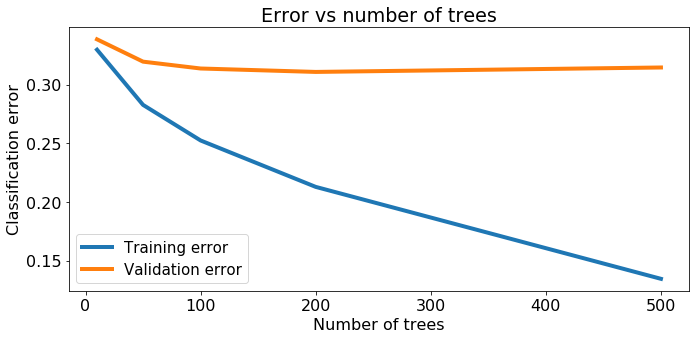

In [92]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')

# Question 8
Does the training error reduce as the number of trees increases?



* Yes

# Question 9
Is it always true that the test/validation error will reduce as the number of trees increases?

* No, the test/validation error will not necessarily always reduce as the number of trees increases.